В этой тетрадке я пытался в подготовку данных и EDA с помощью инструментов: numpy, pandas, matplotlib и seaborn.

Будем работать с задачей кредитного скоринга. Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого.

In [ ]:
import pandas as pd


### Загрузим данные

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", sep = ",")
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [ ]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [ ]:
data.shape

(1000, 21)

### Определяем пропуски, делим признаки на виды, группируем данные

In [ ]:
data.isna().mean()

status                     0.0
duration                   0.0
credit_history             0.0
purpose                    0.0
amount                     0.0
savings                    0.0
employment_duration        0.0
installment_rate           0.0
personal_status_sex        0.0
other_debtors              0.0
present_residence          0.0
property                   0.0
age                        0.0
other_installment_plans    0.0
housing                    0.0
number_credits             0.0
job                        0.0
people_liable              0.0
telephone                  0.0
foreign_worker             0.0
credit_risk                0.0
dtype: float64

In [ ]:
data.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


quantative - количественные, binary - бинарные, ordinal - порядковые, categoriсal - категориальные

In [ ]:
quantative = data[['duration', 'amount', 'age']]#являются просто числами
binary = data[['telephone', 'foreign_worker', 'credit_risk']]#имеют только два возможных значения
ordinal = data[['employment_duration', 'installment_rate', 'present_residence',
                'number_credits', 'people_liable', 'number_credits']]#имеют несколько значений(промежутков), можно упорядочить
categorical = data[['status', 'credit_history', 'savings', 'purpose', 'personal_status_sex', 'other_debtors', 'property',
                    'other_installment_plans', 'housing', 'job']]#нельзя сравнить между собой, только проверить на равенство, в основном нечисленные значения

In [ ]:
data[['amount', 'purpose']].groupby('purpose').mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
print(f"Процент клиентов моложе 30 лет, которые снимают жилье = {((data['age'] < 30) & (data['housing'] == 'rent')).sum()/((data['age'] < 30).sum()) * 100}%")
print(f"Процент клиентов старше 40 лет, которые снимают жилье = {((data['age'] > 40) & (data['housing'] == 'rent')).sum()/((data['age'] > 40).sum()) * 100}%")

Процент клиентов моложе 30 лет, которые снимают жилье = 66.66666666666666%
Процент клиентов старше 40 лет, которые снимают жилье = 68.01470588235294%


 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
data['number_credits'].value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

In [ ]:
print(f"Число иностранцев с 3+ кредитами = {((data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>=6'))).sum()}")

Число иностранцев с 3+ кредитами = 1


### Попробуем различные методы визуализации

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта.

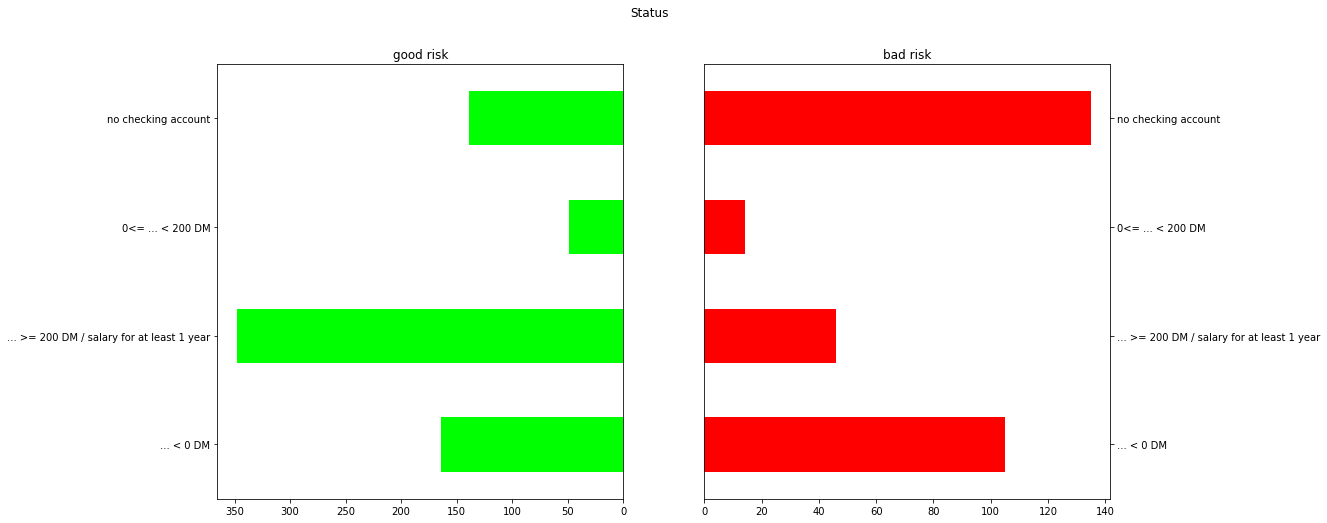

In [ ]:
g = data[data['credit_risk'] == 'good'][['credit_risk', 'status']].groupby('status').count()
b = data[data['credit_risk'] == 'bad'][['credit_risk', 'status']].groupby('status').count()
plane, (fig1, fig2) = plt.subplots(1, 2, figsize = (16, 8))
plane.suptitle('Status')
g.plot(kind = 'barh',ax = fig1, title = 'good risk', color = '#00FF00', legend = None, xlabel = '').invert_xaxis()
b.plot(kind = 'barh',ax = fig2, title = 'bad risk', color = '#FF0000', legend = None, xlabel = '')
fig2.yaxis.tick_right()
plt.show()

In [ ]:
import seaborn as sns

Теперь построим гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn.

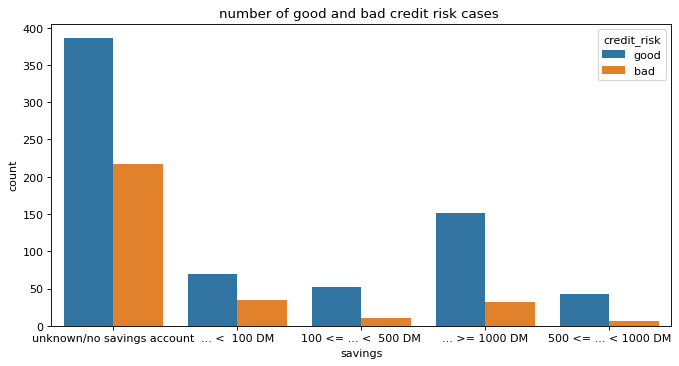

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
sns.countplot(x = 'savings', hue = 'credit_risk', data = data, palette = 'tab10')
plt.title('number of good and bad credit risk cases')
plt.show()

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например.

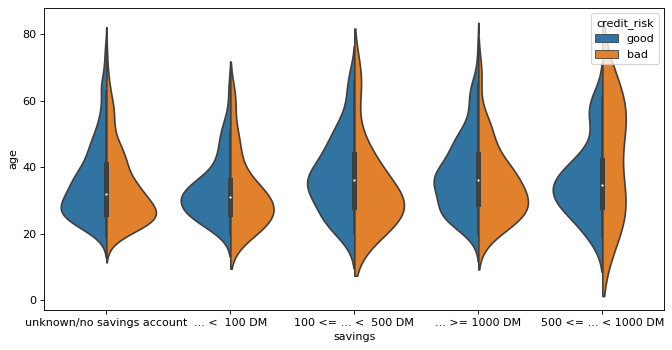

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, split=True, palette='tab10')
plt.show()

С помощью этой визуализации, можно сравнивать средние и моды. Так, видим, что средний возраст кредиторов с хорошим кредитным риском примерно равны для любых значений savings. Для кредиторов с плохим кредитным риском примерно то же самое, кроме ситуацимк, когда 'savings' составляет '500 <= ... < 1000 DM'.

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом.

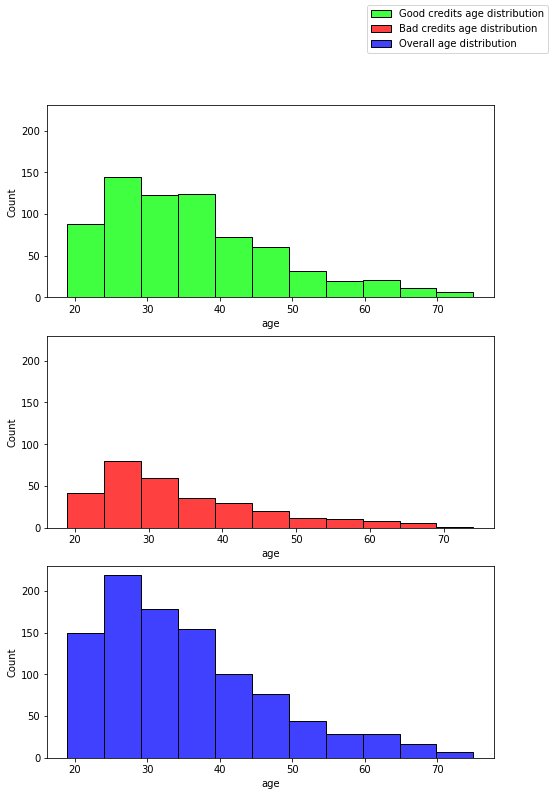

In [ ]:
fig = plt.figure(figsize=(8, 12))

plt.subplot(3, 1, 1)
sns.histplot(gr['age'], bins = 11, label = 'Good credits age distribution', color = '#00FF00').set_ylim(0, 230)
plt.subplot(3, 1, 2)
sns.histplot(br['age'], bins = 11, label = 'Bad credits age distribution', color = '#FF0000' ).set_ylim(0, 230)
plt.subplot(3, 1, 3)
sns.histplot(data['age'], bins = 11, label = 'Overall age distribution', color = '#0000FF').set_ylim(0, 230)
fig.legend()
plt.show()

Явно выраженно то, что в основном кредиты берут в возрасте от 20 до 40 лет. После 55 их почти не берут

Не менее полезной иногда может быть диаграмма рассеяния.

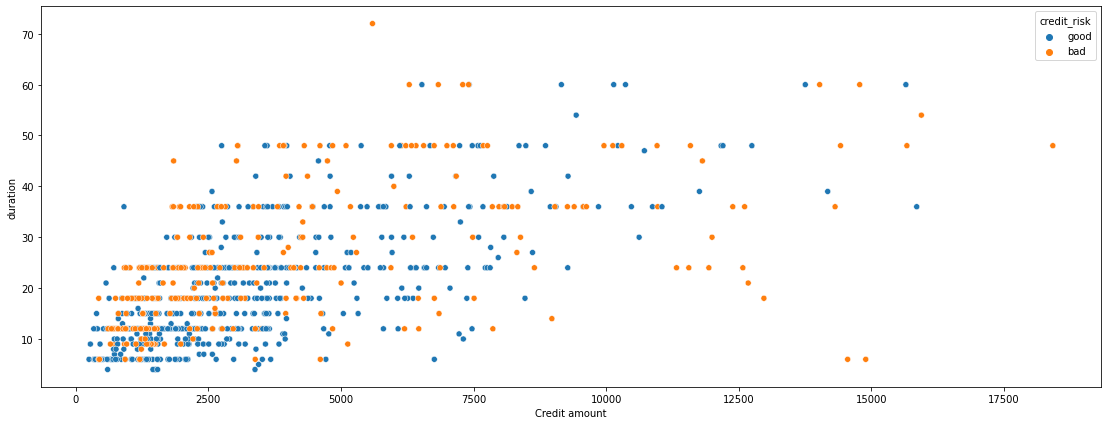

In [ ]:
fig = plt.figure(figsize = (19, 7))
sns.scatterplot(x = 'amount', y = 'duration', hue = 'credit_risk', palette = 'tab10', data = data)
plt.xlabel('Credit amount')
plt.show()

### Закодируем все нечисловые признаки + сообразим простую модельку

In [ ]:
data['foreign_worker'] = data['foreign_worker'].apply(lambda x: 1 if x == "no" else 0)
data['credit_risk'] = data['credit_risk'].apply(lambda x: 0 if x == 'bad' else 1)
data['employment_duration'] = np.select([data['employment_duration'] == '< 1 yr' ,
                                               data['employment_duration'] == '1 <= ... < 4 yrs',
                                               data['employment_duration'] == '4 <= ... < 7 yrs',
                                               data['employment_duration'] == '>= 7 yrs'],
                                               [0, 1, 2, 3])
data['installment_rate'] = np.select([data['installment_rate'] == '< 20' ,
                                            data['installment_rate'] == '20 <= ... < 25',
                                            data['installment_rate'] == '25 <= ... < 35',
                                            data['installment_rate'] == '>= 35'],
                                            [3, 2, 1, 0])
data['present_residence'] = np.select([data['present_residence'] == '>= 7 yrs' ,
                                             data['present_residence'] == '4 <= ... < 7 yrs',
                                             data['present_residence'] == '1 <= ... < 4 yrs',
                                             data['present_residence'] == '< 1 yr'],
                                             [3, 2, 1, 0])
data['number_credits'] = np.select([data['number_credits'] == '1' ,
                                          data['number_credits'] == '2-3',
                                          data['number_credits'] == '4-5',
                                          data['number_credits'] == '>=6'],
                                         [3, 2, 1, 0])
data['people_liable'] = np.select([data['people_liable'] == '0 to 2',
                                       data['people_liable'] == '3 or more'],
                                       [1, 0])


data['status'] = np.select([data['status'] == '0<= ... < 200 DM' ,
                                  data['status'] == '... >= 200 DM / salary for at least 1 year'],
                                  [1, 2])
data['savings'] = np.select([data['savings'] == '... < 100 DM' ,
                                   data['savings'] == '100 <= ... < 500 DM',
                                   data['savings'] == '500 <= ... < 1000 DM',
                                   data['savings'] == '... >= 1000 DM'], [1, 2, 3, 4])
data['credit_history'] = np.select([data['credit_history'] == 'delay in paying off in the past' ,
                                         data['credit_history'] == 'critical account/other credits elsewhere'], [0, 1])
data['other_debtors'] = np.select([data['other_debtors'] == 'none' ,
                                         data['other_debtors'] == 'guarantor'], [1, 2])

data['property'] = np.select([data['property'] == 'unknown / no property' ,
                                      data['property'] == 'car or other'],
                                      [0, 1])

data['job'] = np.select([data['job'] == 'manager/self-empl./highly qualif. employee' ,
                               data['job'] == 'skilled employee/official',
                               data['job'] == 'unskilled - resident'],
                               [3, 2, 1])
data = data.drop(columns = ['purpose', 'personal_status_sex', 'other_installment_plans', 'housing', 'telephone', 'people_liable', 'foreign_worker'], axis = 1)#эти данные не нужны для предсказания кредитного риска(по моему)
data

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,number_credits,job,credit_risk
0,0,18,0,1049,0,0,3,1,3,1,21,3,2,1
1,0,9,0,2799,0,1,1,1,1,0,36,2,2,1
2,0,12,0,841,0,2,1,1,3,0,23,3,1,1
3,0,12,0,2122,0,1,2,1,1,0,39,2,1,1
4,0,12,0,2171,0,1,3,1,3,1,38,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,0,1987,0,1,1,1,3,0,21,3,1,0
996,0,24,0,2303,0,3,3,0,0,0,45,3,2,0
997,2,21,0,12680,4,3,3,1,3,0,30,3,3,0
998,0,12,0,6468,4,0,1,1,0,0,52,3,3,0


### Задание 14  (2 балла)

In [ ]:
def predict(Xtest: np.array) -> np.array:
  ans = np.array([])
  for i in Xtest:
    score = 0
    for j in range(13):
      if j not in(1, 3, 10):#можно было просто удалить эти столбцы, но я не захотел. Не использую, потому что сложно интерпретировать количественные в мою модель + не особо важные признаки для предсказания
        score += i[j]
    if score > 7:
      ans = np.append(ans, 1)
    else:
      ans = np.append(ans, 0)
  return ans

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

<ipython-input-87-830c06079696>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.668